In [49]:
import os
import zipfile
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
from google.colab import drive, files
%matplotlib inline

drive.mount('/content/drive')
  
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), 
                               include_top = False,
                               weights='imagenet')
 
for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed7')
print('Shape of Last Layer: {}'.format(last_layer.output_shape))
last_layer_output = last_layer.output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of Last Layer: (None, 7, 7, 768)


In [50]:
new_layer = layers.Flatten()(last_layer_output)
new_layer = layers.Dense(1024, activation='relu')(new_layer)
new_layer = layers.Dense(1, activation='sigmoid')(new_layer)

model = Model(pre_trained_model.input, new_layer)

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['acc'])

model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_752 (Conv2D)             (None, 74, 74, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_752 (BatchN (None, 74, 74, 32)   96          conv2d_752[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 74, 74, 32)   0           batch_normalization_752[0][0]    
___________________________________________________________________________________________

In [51]:
base_dir = '/content/drive/My Drive/kaggle/chest_unzip'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

train_normal_fnames = os.listdir(train_normal_dir)
test_pneumonia_fnames = os.listdir(test_pneumonia_dir)
test_normal_fnames = os.listdir(test_normal_dir)

print('Normal Images:')
print('Total Normal Images from Training Set: {}'.format(len(os.listdir(train_normal_dir))))
print('Total Normal Images from Test Set: {}'.format(len(os.listdir(test_normal_dir))))

print('---')

print('Pneumonia Images:')
print('Total Pneumonia Images from Training Set: {}'.format(len(os.listdir(train_pneumonia_dir))))
print('Total Pneumonia Images from Test Set: {}'.format(len(os.listdir(test_pneumonia_dir))))


Normal Images:
Total Normal Images from Training Set: 1342
Total Normal Images from Test Set: 234
---
Pneumonia Images:
Total Pneumonia Images from Training Set: 3876
Total Pneumonia Images from Test Set: 390


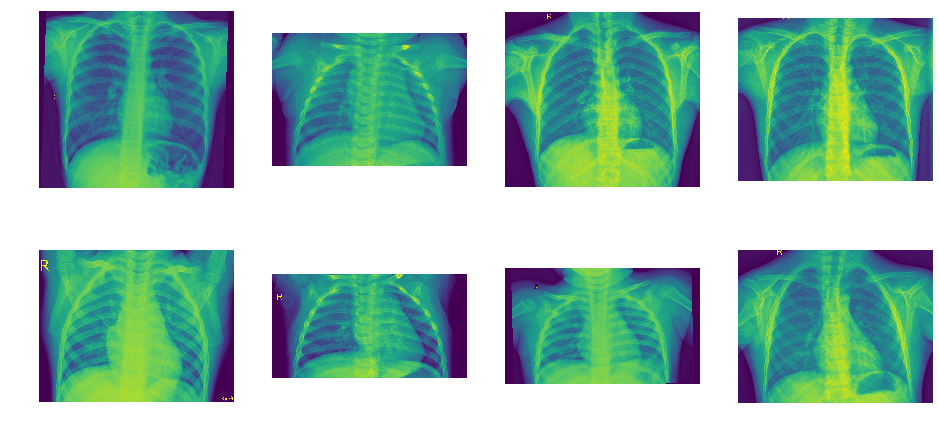

In [52]:
#Normal images from test set.

n_rows = 4
n_cols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

pic_index = 8

next_pix = [os.path.join(test_normal_dir, fname) for fname in test_normal_fnames[0:pic_index]]

for index, img_path in enumerate(next_pix):
  sp = plt.subplot(n_rows, n_cols, index + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

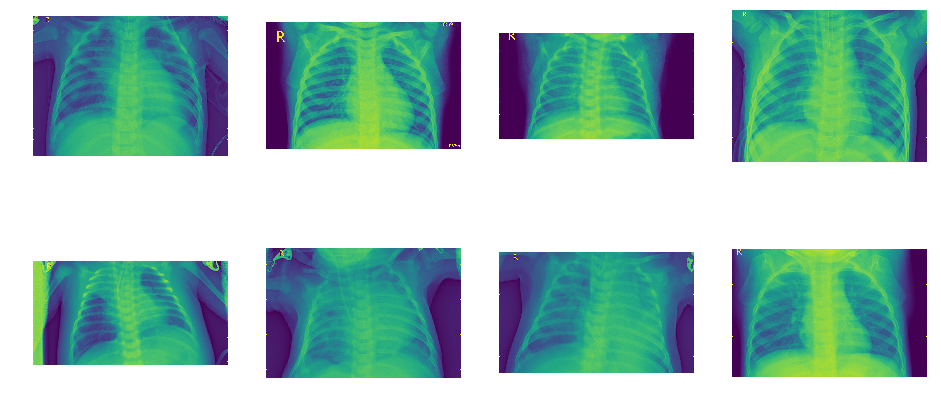

In [53]:
#Pneumonia images from test set.

n_rows = 4
n_cols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

pic_index = 8

next_pix = [os.path.join(test_pneumonia_dir, fname) for fname in test_pneumonia_fnames[0:pic_index]]

for index, img_path in enumerate(next_pix):
  sp = plt.subplot(n_rows, n_cols, index + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [54]:
train_datagen = ImageDataGenerator(rescale = 1./255.)

test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size = (150, 150))     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=10,
                                                   class_mode  = 'binary',
                                                   target_size = (150, 150))

history = model.fit_generator(train_generator,
                              validation_data = test_generator,
                              steps_per_epoch = 10,
                              epochs = 50,
                              validation_steps = 10,
                              verbose = 2)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/50
10/10 - 28s - loss: 3.5170 - acc: 0.6500 - val_loss: 1.0930 - val_acc: 0.7300
Epoch 2/50
10/10 - 9s - loss: 0.4440 - acc: 0.9100 - val_loss: 0.5852 - val_acc: 0.8000
Epoch 3/50
10/10 - 9s - loss: 0.3126 - acc: 0.9400 - val_loss: 0.5652 - val_acc: 0.8600
Epoch 4/50
10/10 - 9s - loss: 0.2246 - acc: 0.9400 - val_loss: 1.7112 - val_acc: 0.7000
Epoch 5/50
10/10 - 9s - loss: 0.1974 - acc: 0.9400 - val_loss: 7.0693 - val_acc: 0.5700
Epoch 6/50
10/10 - 9s - loss: 0.7375 - acc: 0.8400 - val_loss: 0.6172 - val_acc: 0.8100
Epoch 7/50
10/10 - 9s - loss: 0.1093 - acc: 0.9500 - val_loss: 4.3849 - val_acc: 0.6000
Epoch 8/50
10/10 - 10s - loss: 0.1226 - acc: 0.9200 - val_loss: 0.8449 - val_acc: 0.8500
Epoch 9/50
10/10 - 9s - loss: 0.2146 - acc: 0.9500 - val_loss: 2.7531 - val_acc: 0.6700
Epoch 10/50
10/10 - 9s - loss: 0.1980 - acc: 0.9400 - val_loss: 0.8745 - val_acc: 0.8500
Epoch 11/50
10/10 - 9s - loss: 0.3

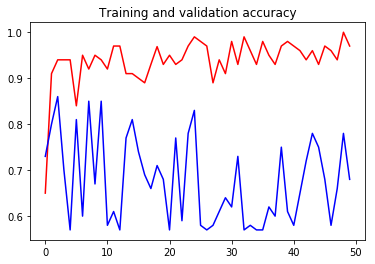

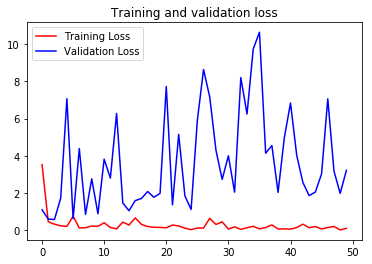

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
uploaded_files = files.upload()

for file_name in uploaded_files.keys():
  path = file_name
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(file_name)
  print(classes)

Saving person1947_bacteria_4876.jpeg to person1947_bacteria_4876 (2).jpeg
Saving person1954_bacteria_4886.jpeg to person1954_bacteria_4886 (1).jpeg
Saving person1949_bacteria_4880.jpeg to person1949_bacteria_4880 (1).jpeg
Saving person1946_bacteria_4875.jpeg to person1946_bacteria_4875 (1).jpeg
Saving person1946_bacteria_4874.jpeg to person1946_bacteria_4874 (1).jpeg
Saving person1952_bacteria_4883.jpeg to person1952_bacteria_4883 (1).jpeg
Saving person1951_bacteria_4882.jpeg to person1951_bacteria_4882 (1).jpeg
Saving person1950_bacteria_4881.jpeg to person1950_bacteria_4881 (1).jpeg
Saving NORMAL2-IM-1438-0001.jpeg to NORMAL2-IM-1438-0001 (1).jpeg
Saving NORMAL2-IM-1437-0001.jpeg to NORMAL2-IM-1437-0001 (1).jpeg
Saving NORMAL2-IM-1436-0001.jpeg to NORMAL2-IM-1436-0001 (2).jpeg
Saving NORMAL2-IM-1431-0001.jpeg to NORMAL2-IM-1431-0001 (1).jpeg
Saving NORMAL2-IM-1430-0001.jpeg to NORMAL2-IM-1430-0001 (1).jpeg
Saving NORMAL2-IM-1427-0001.jpeg to NORMAL2-IM-1427-0001 (1).jpeg
Saving NORMA